<a href="https://colab.research.google.com/github/GeorgeXen/Heart-Disease-Preditiction/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Dependencies**


In [63]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

# **Data Collection**

In [4]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [5]:
#Data shape
heart_data.shape

(303, 14)

In [6]:
#Information about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#how to check for missing values
heart_data.isnull().sum()
#we see that there are no missing values (0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Pre-Proessing the data with 0 and 1**

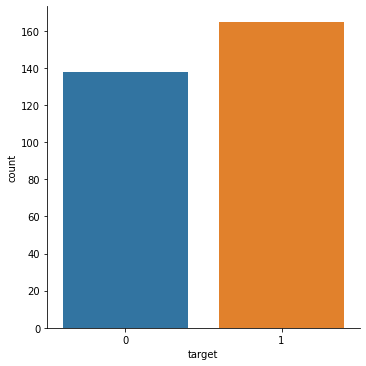

In [45]:
sns.catplot(x='target',kind='count',  data=heart_data)

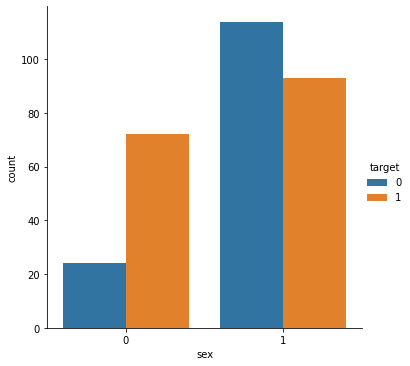

In [44]:
sns.catplot(x='sex', kind='count', hue='target', data= heart_data)

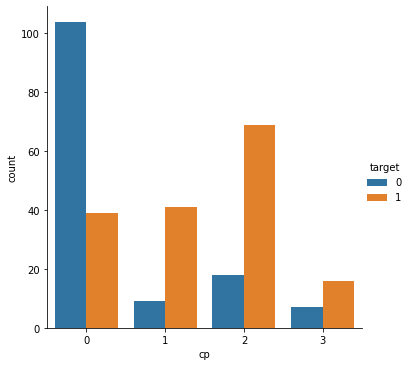

In [43]:
sns.catplot(x='cp', kind='count', hue='target', data= heart_data)

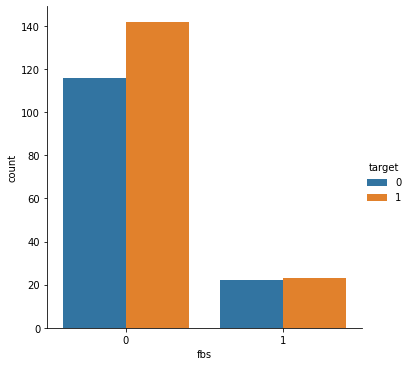

In [47]:
sns.catplot(x='fbs', kind='count', hue='target', data= heart_data)

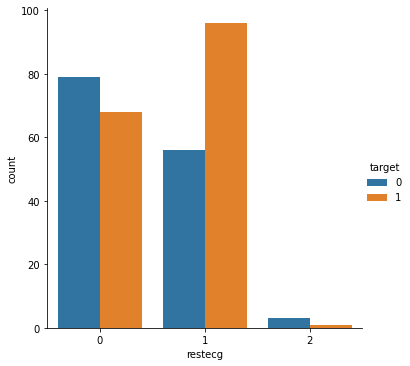

In [48]:
sns.catplot(x='restecg', kind='count', hue='target', data= heart_data)

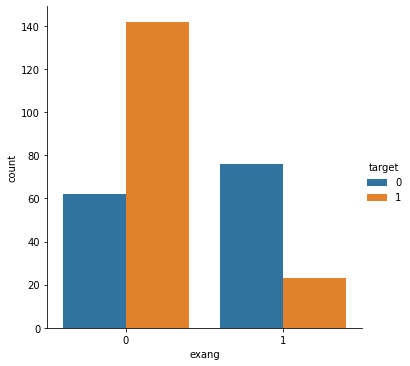

In [49]:
sns.catplot(x='exang', kind='count', hue='target', data= heart_data)

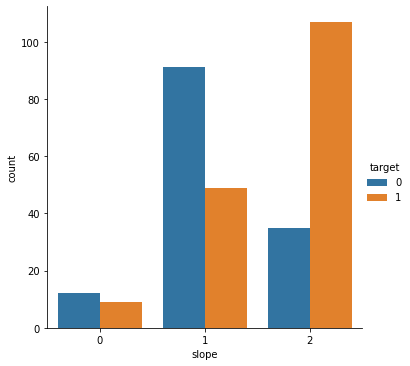

In [50]:
sns.catplot(x='slope', kind='count', hue='target', data= heart_data)

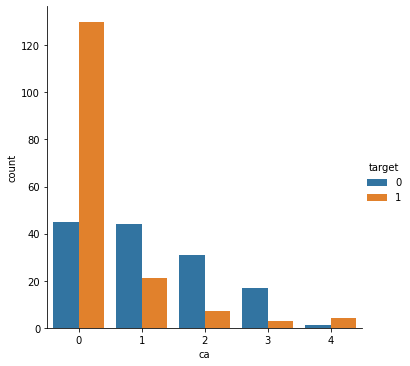

In [51]:
sns.catplot(x='ca', kind='count', hue='target', data= heart_data)

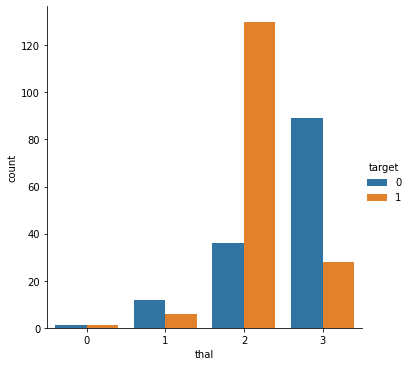

In [52]:
sns.catplot(x='thal', kind='count', hue='target', data= heart_data)

# **Distributional predictive variables**

In [53]:
#Data statistics
heart_data[['age', 'trestbps','chol','thalach','oldpeak']].describe()

age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

In [54]:
#check target distribution 
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

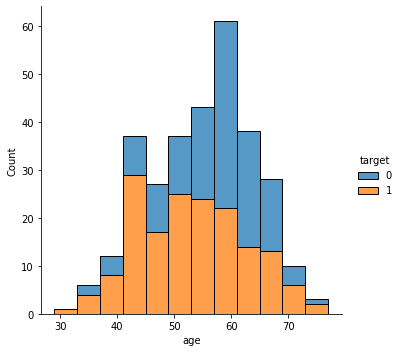

In [55]:
sns.displot(x='age',multiple='stack',hue='target',data=heart_data)

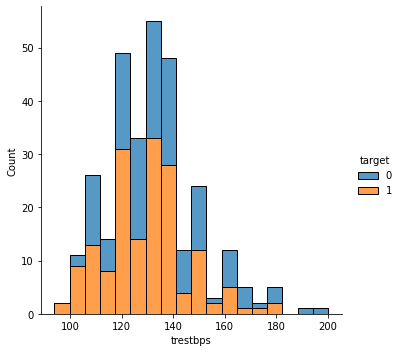

In [56]:
sns.displot(x='trestbps',multiple='stack',hue='target',data=heart_data)

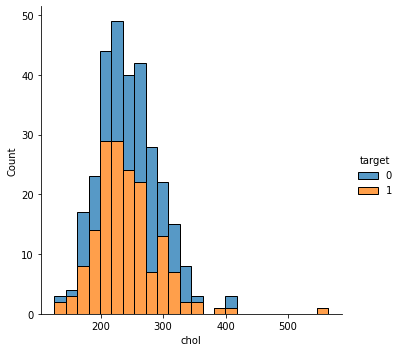

In [57]:
sns.displot(x='chol',multiple='stack',hue='target',data=heart_data)

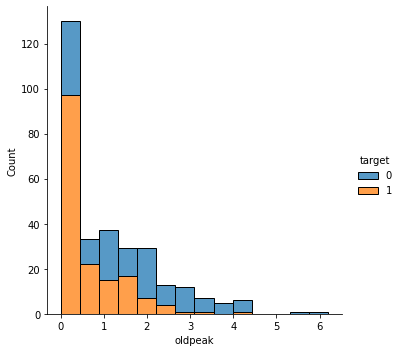

In [58]:
sns.displot(x='oldpeak',multiple='stack',hue='target',data=heart_data)

# **Splitting and pre-rocessing**

In [15]:
 #with drop you just select the columns you need to remove
x = heart_data.drop(columns= 'target', axis=1)
y = heart_data['target']

In [16]:
print(x)
#we have everything without the target    

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [12]:
print(y)
#its only the target. It shows who has 1 or 0.

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# **Splitting the data to train_data - test_data**

In [18]:
#the x_train data contains all the features of all the training data and x_test contains all the features of the test data
#the y_train data contains all the target of x_train and y_test contains all the target of x_test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y,random_state= 2)

In [19]:
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


# **Model training**

Logistic Regression 


In [21]:
model = LogisticRegression()

In [22]:
#training the logistic regression mmodel with training data
model.fit(x_train, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation 

**Accuracy score**

In [25]:
#accuracy on training data  
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on training data: ',training_data_accuracy)

Accuracy on training data:  0.8512396694214877


In [26]:
#accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Acuracy on test data: ',test_data_accuracy)

Acuracy on test data:  0.819672131147541


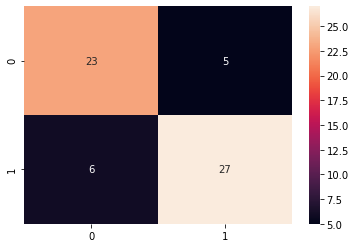

In [64]:
#confusion matrix
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [68]:
#Calculating sensitivity, specificity, PPV (positive predictive value), and NPV (Negative predictive value)
TP = 27
FP = 5
TN = 23
FN = 6
sensitivity = TP / (TP + FN) * 100 
specificity = TN / (TN + FP) * 100
ppv = TP / (TP + FP) * 100
npv = TN / (TN + FN) * 100

In [69]:
print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' )

Sensitivity: 81.81818181818183 %  Specificity: 82.14285714285714 %  positive predictive value: 84.375 %  negative predictive value: 79.3103448275862 %


## Predicting System 

In [71]:
data= (67,1,0,160,286,0,0,108,1,1.5,1,3,2)
input_data_as_numpy_array= np.asarray(data)
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction =model.predict(input_data_reshaped)

if (prediction == 1):
  print('Positive')
else:
  print ('Negative')

Negative
